In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr, pearsonr

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.cm as cm

from sklearn.manifold import TSNE



In [4]:
%config InlineBackend.figure_format='retina'



In [5]:

# path_tail_sac = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/tail_sac_log_multisp.csv"
path_max = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/max_tail_sac_log_multisp.csv"
## Full dataset
# path = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_multisp_log.csv"

path_arakawa = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/arakawa_ara.csv"
# path = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_full_multisp_log_20_lascID.csv"
# path = "C:/Users/46705/Documents/SpiderSilk/generalized/filtered_sp_added_90p_nonzero_values_log_multsp.csv"
path_anno = "C:/Users/46705/Documents/SpiderSilk/data/annotations/annotation.csv"
# path_not_log = "C:/Users/46705/Documents/SpiderSilk/generalized/filtered_sp_added_90p_nonzero_values.csv"
# df = pd.read_csv(path, sep= ",")



path_MaG = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/MaG_ara.csv"


mag =pd.read_csv(path_MaG, sep= ",")
arakawa = pd.read_csv(path_arakawa, sep= ",")


spidroin_conts_path = "C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/df_grouped.csv"

file_connectoion = "C:/Users/46705/Documents/SpiderSilk/data/raw_data/S1-S4/data_s1.csv"

df_anno = pd.read_csv(path_anno, sep= ",")
df_sp = pd.read_csv(spidroin_conts_path, sep= ",")
# df = pd.read_csv(path_tail_sac, sep= ",")


In [ ]:

# df = pd.concat([df.iloc[:4], df[df["Family"] == "Araneidae"]])
# df.to_csv("C:/Users/46705/Documents/SpiderSilk/data/post_filtering/gland_araneidae.csv", index=False)

### Decide on what df to look at. 


In [10]:
df = mag
# df = pd.concat([df.iloc[:4], df[df["Family"] == "Araneidae"]])
pc = "PC1"
n_comp = 5

# df = mag
# pc = "PC1"
# n_comp = 5

In [7]:
data = df.iloc[4:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)
mech_prop = ['toughness',"young's_modulus", 'tensile_strength', 'strain_at_break']


Explained Variance Ratio: [0.07190283 0.05055696 0.04394681 0.04193    0.03814348 0.03116779
 0.03099225 0.02925605 0.0274195  0.02667188 0.02445383 0.02397475
 0.02215294 0.02156917 0.02044116 0.02016896 0.01958145 0.0192644
 0.01782885 0.01680427]


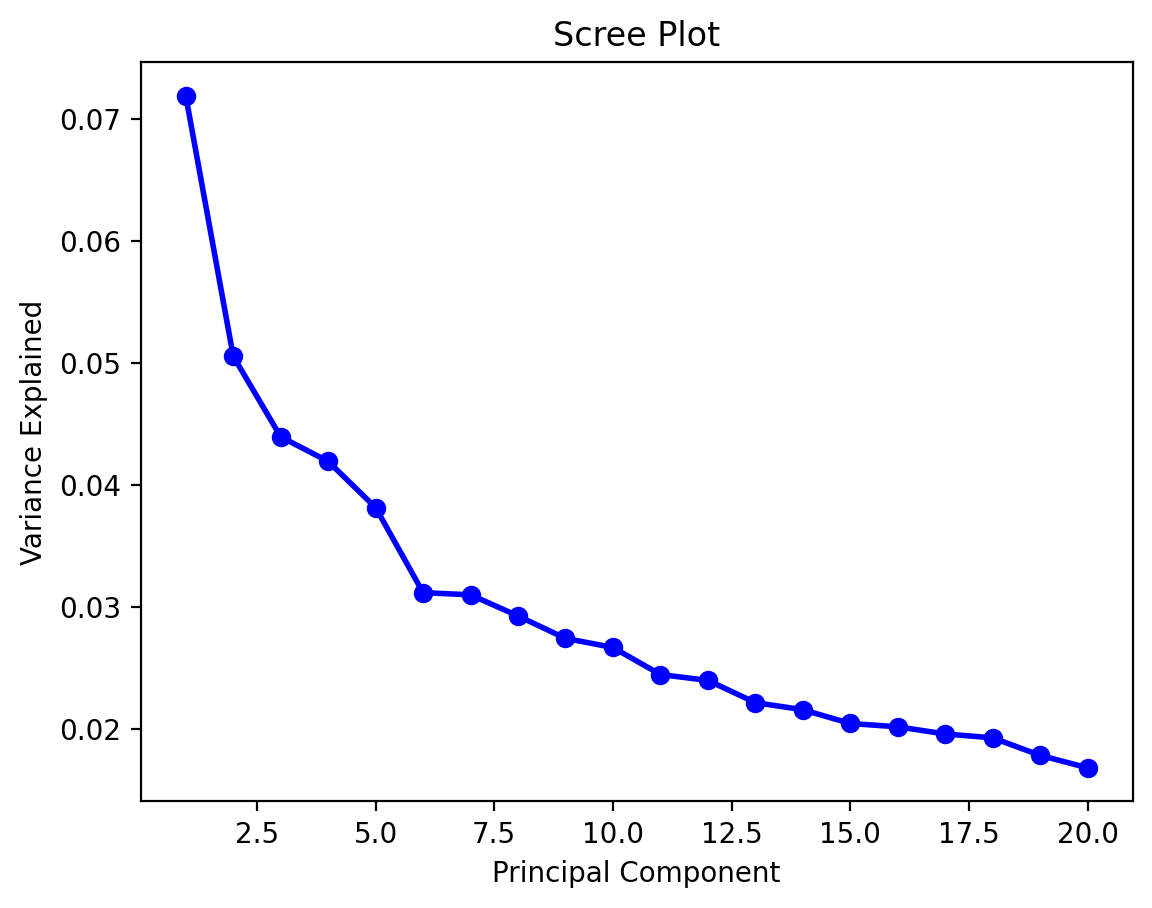

0.5982273366425033

In [9]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
df_standardized = pd.DataFrame(standardized_data, columns=data.columns)

pca = PCA(n_components=20)
principal_components = pca.fit_transform(data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
sum(pca.explained_variance_ratio_)

n_comp components keep on using. --> 

In [11]:

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
df_standardized = pd.DataFrame(standardized_data, columns=data.columns)

pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

scaled_principal_components = principal_components
df_filtered_PC = df[4:].copy()  # Create a copy of df_filtered_

pc_colnames= []
# Iterate over the principal components
for i in range(scaled_principal_components.shape[1]):
    pc_name = f"PC{i+1}"  # Name of the principal component column
    df_filtered_PC[pc_name] = scaled_principal_components[:, i]
    
    pc_colnames.append(pc_name)

df_filtered_PC

print(sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.07190283 0.05055696 0.04394681 0.04193    0.03814348]
0.24648007575754705


In [ ]:
# sns.pairplot(df_filtered_PC[pc_colnames + mech_prop])

PCA

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# Get the column names of 'data'
columns_to_drop = data.columns

# Drop the columns from 'df_filtered_PC'
df_pca = df_filtered_PC.drop(columns_to_drop, axis=1)

pca_data = df_pca.iloc[:, -n_comp:]
pca_data


PC1        PC2       PC3       PC4        PC5
4    14.383159   0.082740  1.204739 -5.751951   1.523601
5     0.196864  -2.543155  0.871288 -6.337869   6.167887
6    -4.598410  -6.674742  1.808077 -1.414359   5.431360
7    -0.583197  -1.167948  4.757926  2.738193 -10.861041
8    -0.941693   3.184763 -5.253997 -6.018770  -0.459497
..         ...        ...       ...       ...        ...
134  -1.534417 -11.889078 -1.594008  8.745927  -0.910185
135   7.473192  -3.413079  2.859714  0.931200   8.291276
136   3.627448  -3.481020  0.901591 -4.105048  -9.034911
137   8.337957   1.101550  3.923120  0.181983  -0.120425
138  19.533839  -0.902240  7.505171  0.186992  -0.634732

[135 rows x 5 columns]

In [13]:

loadings_df = pd.DataFrame(pca.components_, columns=data.columns).T

loadings_df.columns = [f"PC{i+1}" for i in range(loadings_df.shape[1])]

loadings_df

PC1       PC2       PC3       PC4       PC5
OG0000013  0.042328 -0.009609  0.005362  0.036042  0.054884
OG0000022  0.037194  0.003290 -0.019042  0.041572  0.037596
OG0000031  0.037017  0.054321  0.092352 -0.010618  0.054017
OG0000033  0.036567  0.102712  0.070775  0.071351 -0.052332
OG0000042  0.010321  0.036125  0.016212  0.003094  0.019792
...             ...       ...       ...       ...       ...
OG0009064 -0.055117 -0.026197 -0.073227  0.047545 -0.030506
OG0009320  0.013465 -0.188988  0.028091 -0.050121 -0.156687
OG0000050 -0.042071 -0.076492  0.034424  0.066062 -0.004789
OG0002778 -0.097265 -0.012688 -0.018355  0.121373 -0.026275
OG0007640  0.012350 -0.094474  0.000715  0.095568 -0.039710

[173 rows x 5 columns]

In [14]:
pc = "PC1"

### full loadings


In [15]:
sub_df = loadings_df

In [ ]:
# pc = "PC1"
# columns_to_convert = ["PC1", "PC2", "PC3", "PC4", "PC5"]
# grouped_df[columns_to_convert] = grouped_df[columns_to_convert].astype(float)

# grouped_df= grouped_df.sort_values(by = pc)
# grouped_df = grouped_df.rename(columns={"index": "OG_id"})

# # Sort the DataFrame based on the absolute value of the column 'pc'
# grouped_df_sorted = grouped_df.assign(abs_pc=grouped_df[pc].abs()).sort_values(by='abs_pc', ascending=False).drop(columns='abs_pc')

# # Display the sorted DataFrame

# grouped_df_sorted.head(20)

# # grouped_df[grouped_df["cluster"].str.contains(r'\bZoneA_SpiCE-LMa3\b', na=False)]

### save loadings

In [ ]:
# grouped_df_sorted.to_csv("C:/Users/46705/Documents/SpiderSilk/output/loadings/ara_GC_PC3.csv", index = False)

In [ ]:
# list_bool_pc2 = ['OG0008243', 'OG0009245', 'OG0000797', 'OG0002169', 'OG0000447', 'OG0009194', 'OG0001528', 'OG0007640', 'OG0000478', 'OG0005472', 'OG0000352', 'OG0011685', 'OG0009741', 'OG0007102']

# # Check how many values in "OG_id" column are in list_bool_pc2
# mask = grouped_df["OG_id"].isin(list_bool_pc2)
# count_in_both = mask.sum()


# values_in_both = grouped_df.loc[mask, "OG_id"].unique().tolist()

# print("Number of values in both list and column:", count_in_both)
# print("Values present in both list and column:", values_in_both)

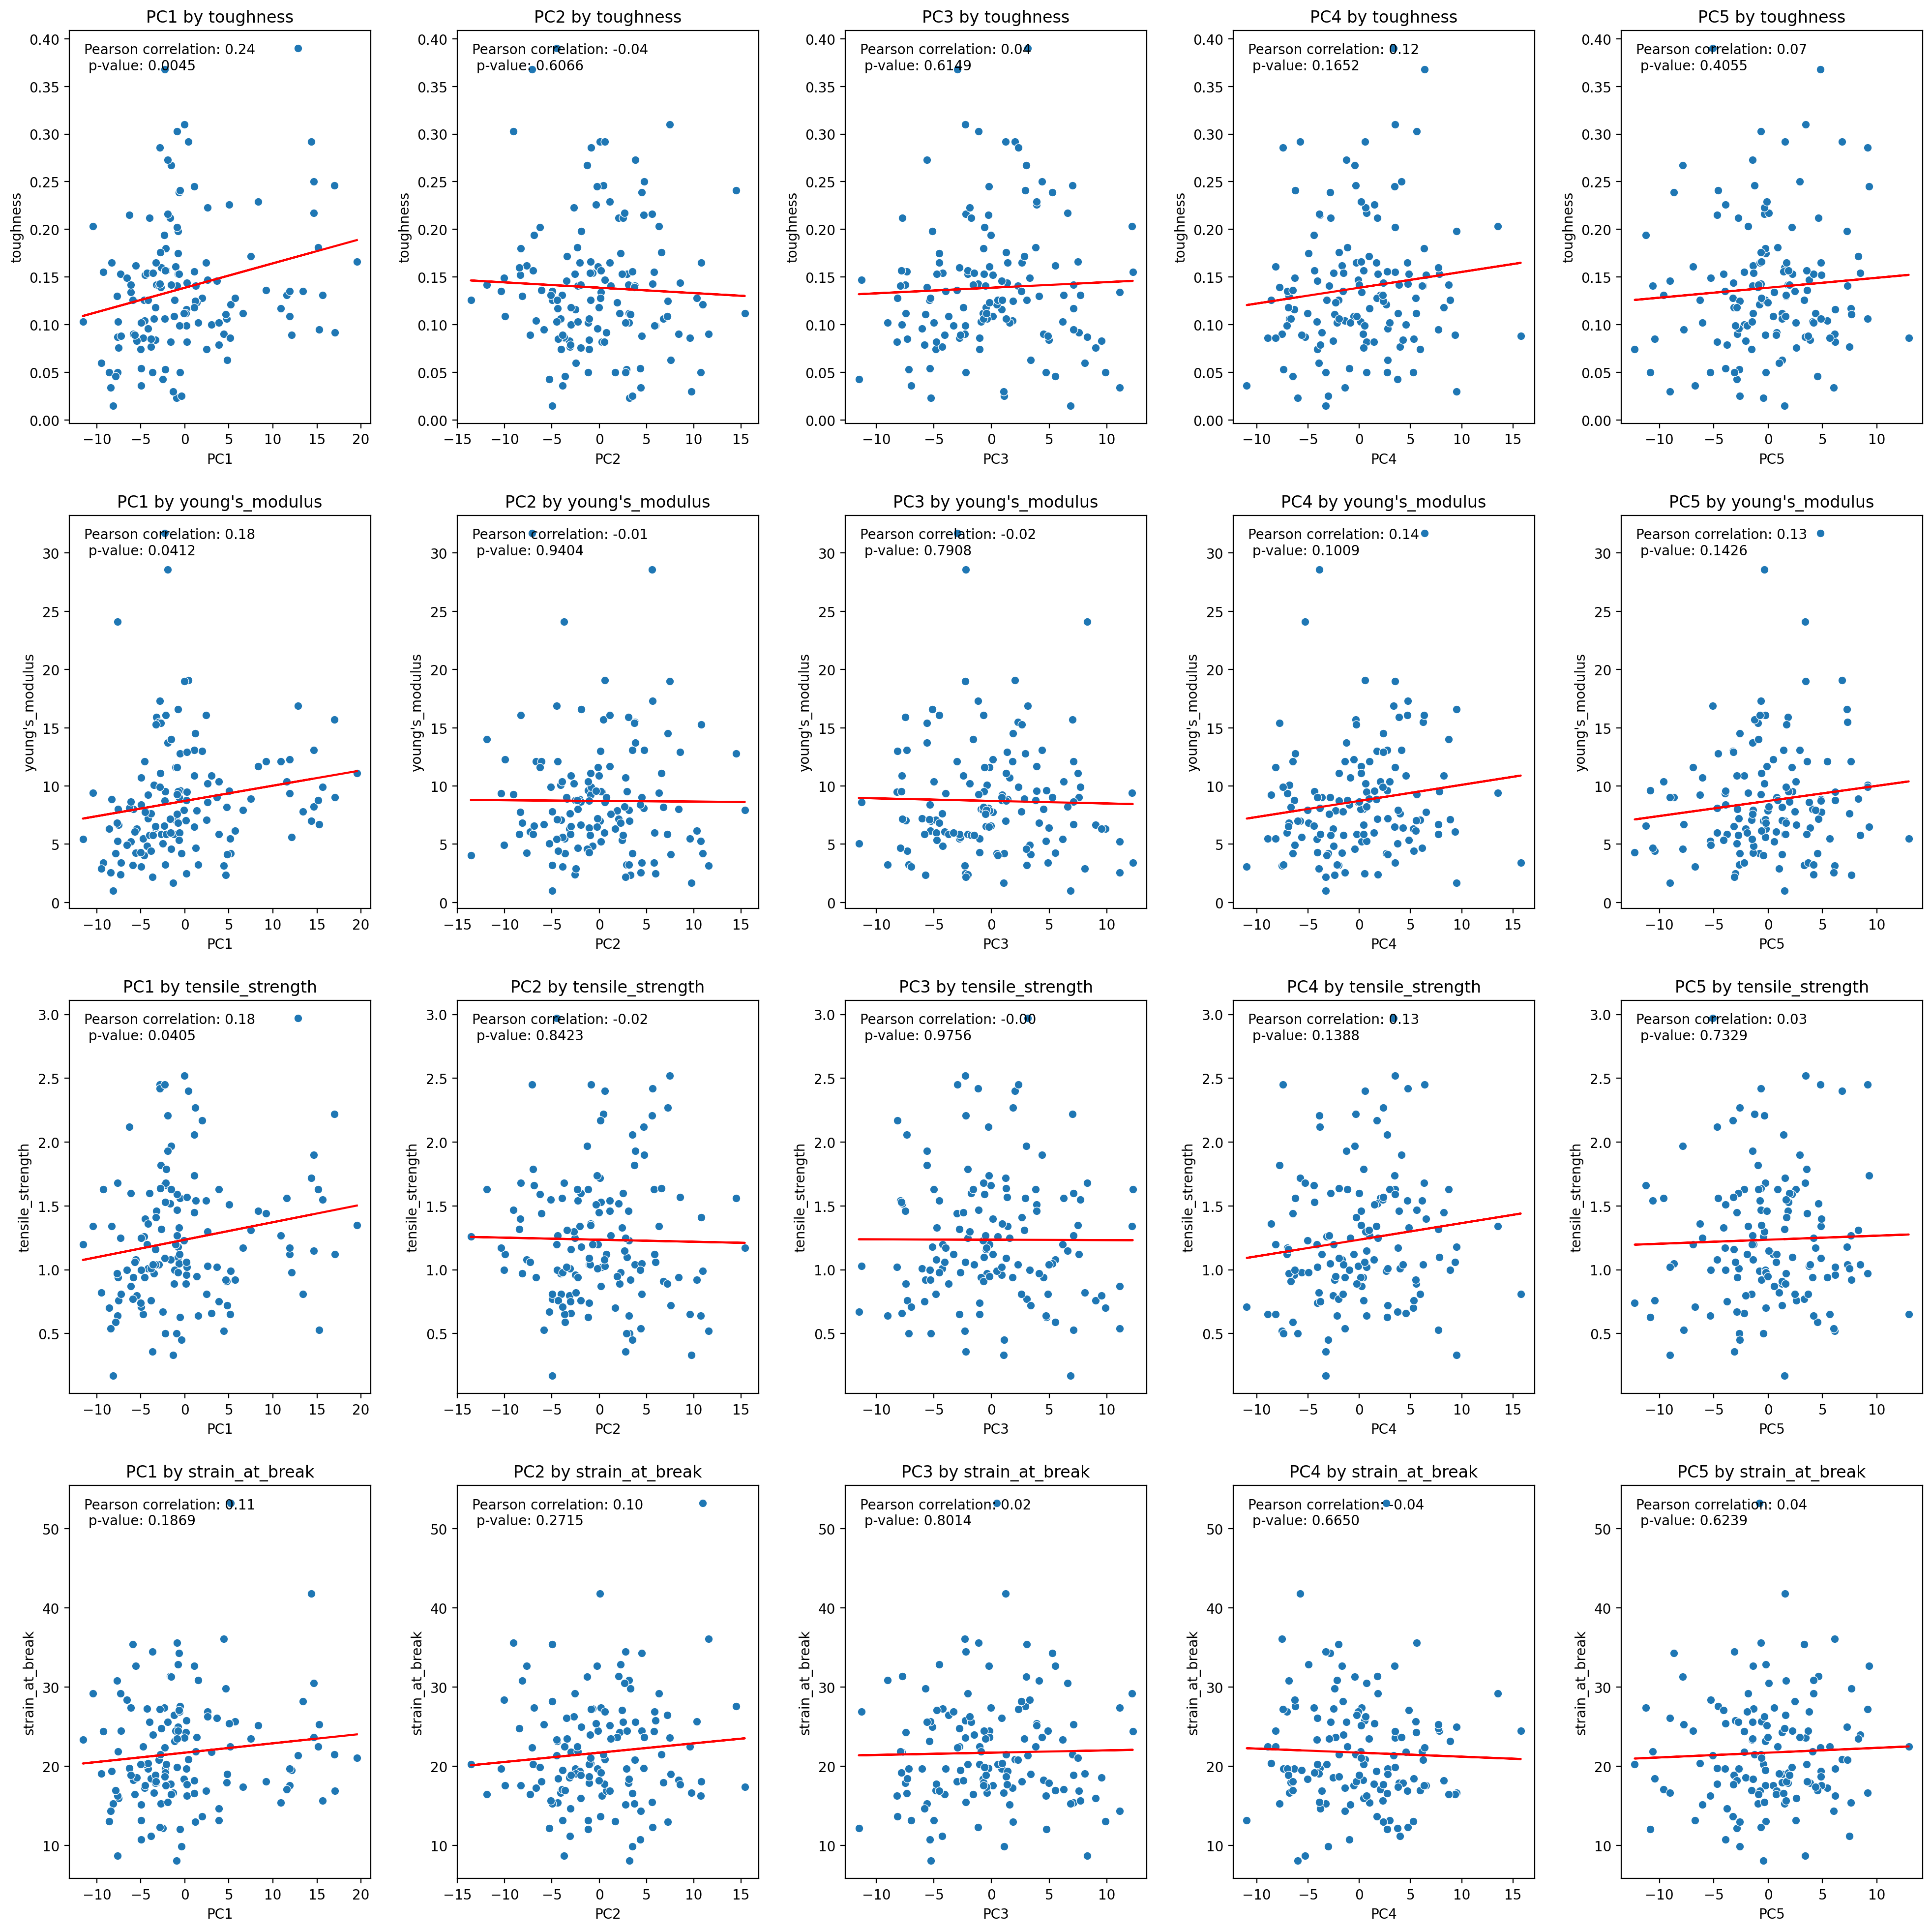

In [17]:

fig, axes = plt.subplots(nrows=len(mech_prop), ncols=5, figsize=(20, 5 * len(mech_prop)))

for j, prop in enumerate(mech_prop):
    for i, pc in enumerate(["PC1", "PC2", "PC3", "PC4", "PC5"]):
        correlation_coefficient, p_value = pearsonr(df_filtered_PC[pc], df_filtered_PC[prop])

        sns.scatterplot(x=pc, y=prop, data=df_filtered_PC,  ax=axes[j, i])
        axes[j, i].set_ylabel(prop)
        axes[j, i].set_xlabel(f"{pc}")
        axes[j, i].set_title(f'{pc} by {prop}')

        slope, intercept = np.polyfit(df_filtered_PC[pc], df_filtered_PC[prop], 1)
        axes[j, i].plot(df_filtered_PC[pc], slope * df_filtered_PC[pc] + intercept, color='red')
        axes[j, i].text(0.05, 0.9, f"Pearson correlation: {correlation_coefficient:.2f}\n p-value: {p_value:.4f}", 
                        fontsize=10, transform=axes[j, i].transAxes)

plt.tight_layout(pad=2.0)
plt.show()

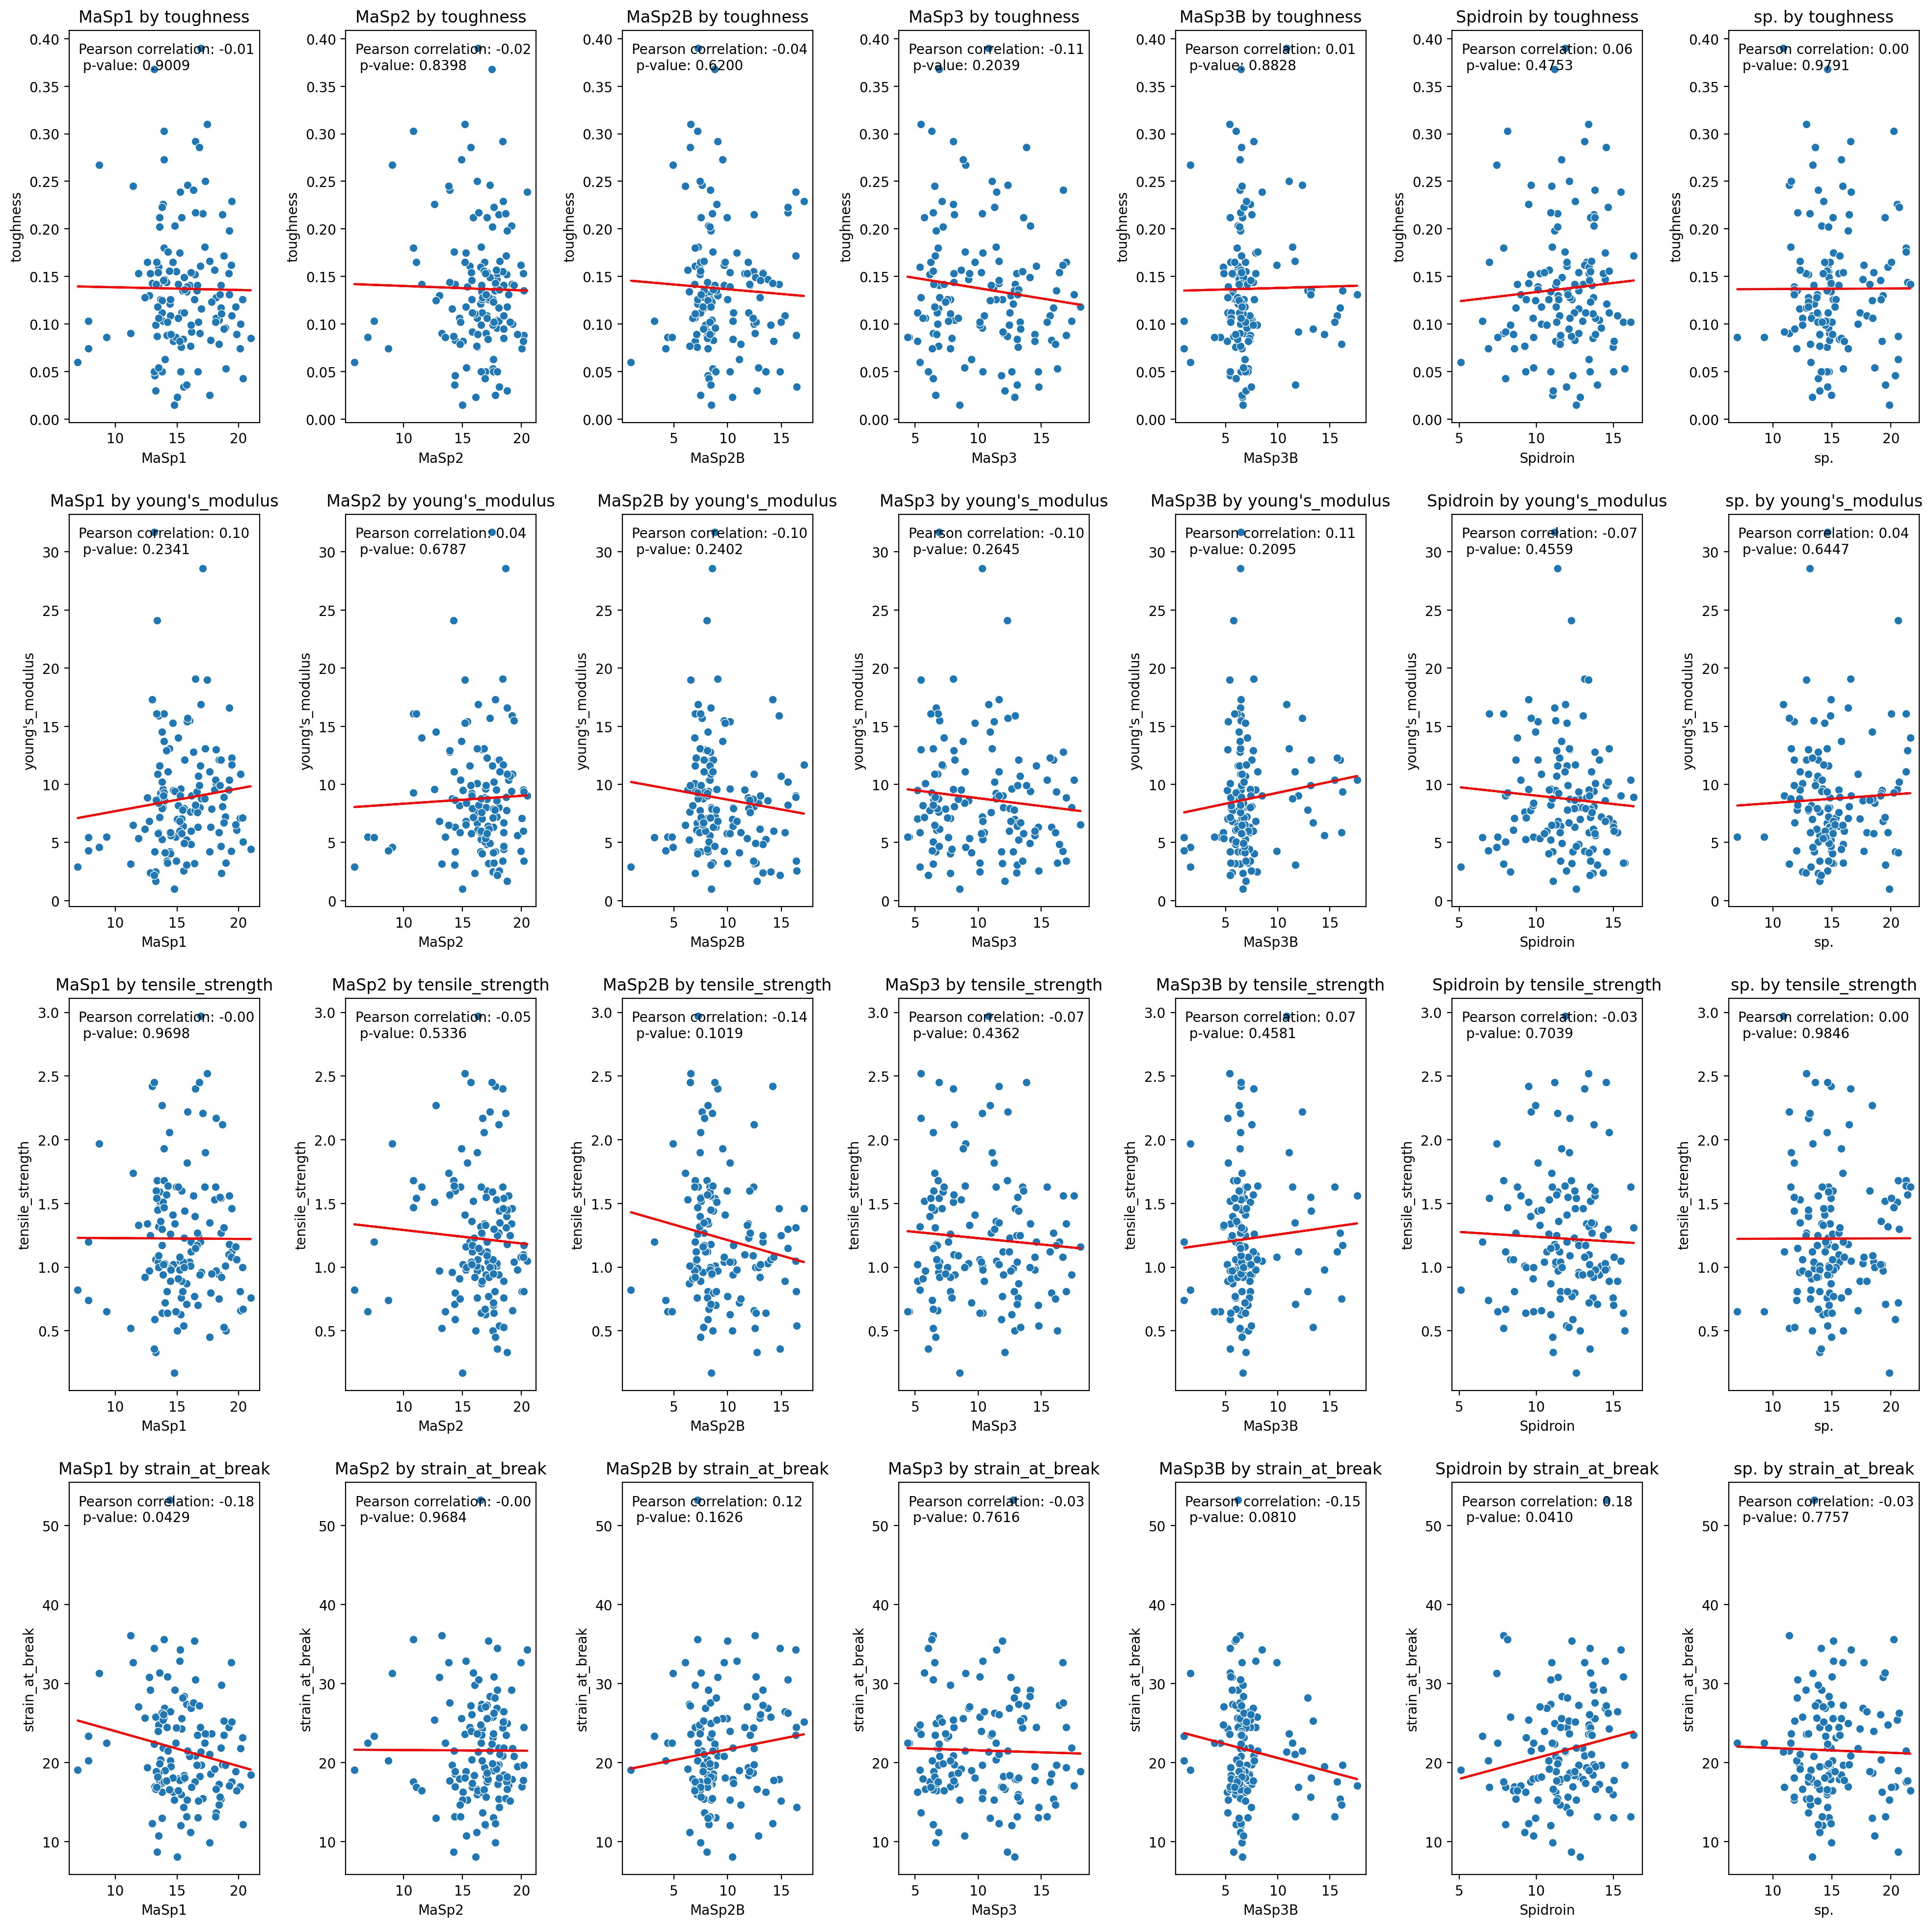

In [ ]:

# fig, axes = plt.subplots(nrows=len(mech_prop), ncols=7, figsize=(20, 5 * len(mech_prop)))

# for j, prop in enumerate(mech_prop):
#     for i, pc in enumerate(['MaSp1', 'MaSp2', 'MaSp2B', 'MaSp3', 'MaSp3B', 'Spidroin', 'sp.']):
#         correlation_coefficient, p_value = pearsonr(df_filtered_PC[pc], df_filtered_PC[prop])

#         sns.scatterplot(x=pc, y=prop, data=df_filtered_PC,  ax=axes[j, i])
#         axes[j, i].set_ylabel(prop)
#         axes[j, i].set_xlabel(f"{pc}")
#         axes[j, i].set_title(f'{pc} by {prop}')

#         slope, intercept = np.polyfit(df_filtered_PC[pc], df_filtered_PC[prop], 1)
#         axes[j, i].plot(df_filtered_PC[pc], slope * df_filtered_PC[pc] + intercept, color='red')
#         axes[j, i].text(0.05, 0.9, f"Pearson correlation: {correlation_coefficient:.2f}\n p-value: {p_value:.4f}", 
#                         fontsize=10, transform=axes[j, i].transAxes)

# plt.tight_layout(pad=2.0)
# plt.show()



### Random forest


In [ ]:
df_tsne

Orthogroup           ID  idv_id        DRR  species_x          Genus  \
4            0   101-W7_S13   101.0  DRR296821    pilipes        Nephila   
5            1   1345-W1_S7  1345.0  DRR296993        sia      Yaginumia   
6            3   1793-W1_S4  1793.0  DRR297051     akirai    Cyrtarachne   
7            4  1894-W1_S12  1894.0  DRR296495  ishisawai        Araneus   
8            5   1974-W1_S8  1974.0  DRR297664  marmoreus        Araneus   
..         ...          ...     ...        ...        ...            ...   
134        282  7416-W1_S13  7416.0  DRR168635          -     Cyrtophora   
135        283  7421-W1_S15  7421.0  DRR168623    extrusa     Caerostris   
136        284   7426-W1_S6  7426.0  DRR168628          -   Acrosomoides   
137        285  7439-W1_S16  7439.0  DRR168624    darwini     Caerostris   
138        286   7441-W1_S4  7441.0  DRR168617   inaurata  Trichonephila   

        Family          OG0000000           OG0000001          OG0000002  ...  \
4    Araneidae  8.811687887311393   8.986630022236454     9.750225179608  ...   
5    Araneidae  9.158661523328707   8.186805631261004  7.305425076610168  ...   
6    Araneidae  9.111104418460606   7.621495784064605  6.859306968557391  ...   
7    Araneidae  9.669626269405452     7.1107687981588  6.938554448821161  ...   
8    Araneidae  8.998412689485896  11.523340383424733  7.640221860148695  ...   
..         ...                ...                 ...                ...  ...   
134  Araneidae          10.143756             9.05932           8.643217  ...   
135  Araneidae           10.91385           11.048308           8.559903  ...   
136  Araneidae           9.266998            6.959671           6.609804  ...   
137  Araneidae          10.680324            11.35473           8.350685  ...   
138  Araneidae           9.554096            9.380179           9.943833  ...   

           PC1        PC2        PC3        PC4        PC5 Cluster_DB  \
4    64.368114 -58.072872   2.822574  14.426933  12.332874         -1   
5   -17.565698  -4.974202  12.485125 -16.550661   4.811574         -1   
6    -2.548949   4.014054  -4.596063 -10.069126  19.066053         -1   
7   -15.555736  -2.874960  -3.914789  -7.250990  37.734722         -1   
8    18.633295  45.042153 -41.523769  11.175459  35.500109         -1   
..         ...        ...        ...        ...        ...        ...   
134 -52.204321 -39.610435  50.689238 -32.074519  14.505360         -1   
135  34.671032 -45.652044  26.191101  15.921900  12.015061         -1   
136 -25.089031  59.674590  45.875491  40.762105  15.865320         -1   
137  38.708216 -69.110710  20.686127   5.891267  18.699412         -1   
138  64.885586 -50.054998  -9.869306  33.707803   2.938760         -1   

    Cluster_Agg Cluster_KMean     comp-1     comp-2  
4             2             1   3.550602  46.045395  
5             1             5  -1.937505 -15.822783  
6             4             5  -2.663112  -1.354694  
7             4             5  -5.443274  -1.562755  
8             0             2  -8.213840  -4.889910  
..          ...           ...        ...        ...  
134           1             5 -10.394670 -18.867029  
135           2             1   4.381101  47.533432  
136           3             4 -17.960821  19.469055  
137           2             1   5.708998  47.364792  
138           2             1   1.372662  45.502766  

[135 rows x 8656 columns]

In [ ]:
clus_3 = df_tsne[df_tsne["Cluster_Agg"] == 3]
clus_3["DRR"].to_list()

['DRR296943',
 'DRR297180',
 'DRR296820',
 'DRR297052',
 'DRR296564',
 'DRR296546',
 'DRR296662',
 'DRR297961',
 'DRR296576',
 'DRR296634',
 'DRR296908',
 'DRR296519',
 'DRR297425',
 'DRR165467',
 'DRR165471',
 'DRR296473',
 'DRR168628']

<Figure size 1200x800 with 0 Axes>

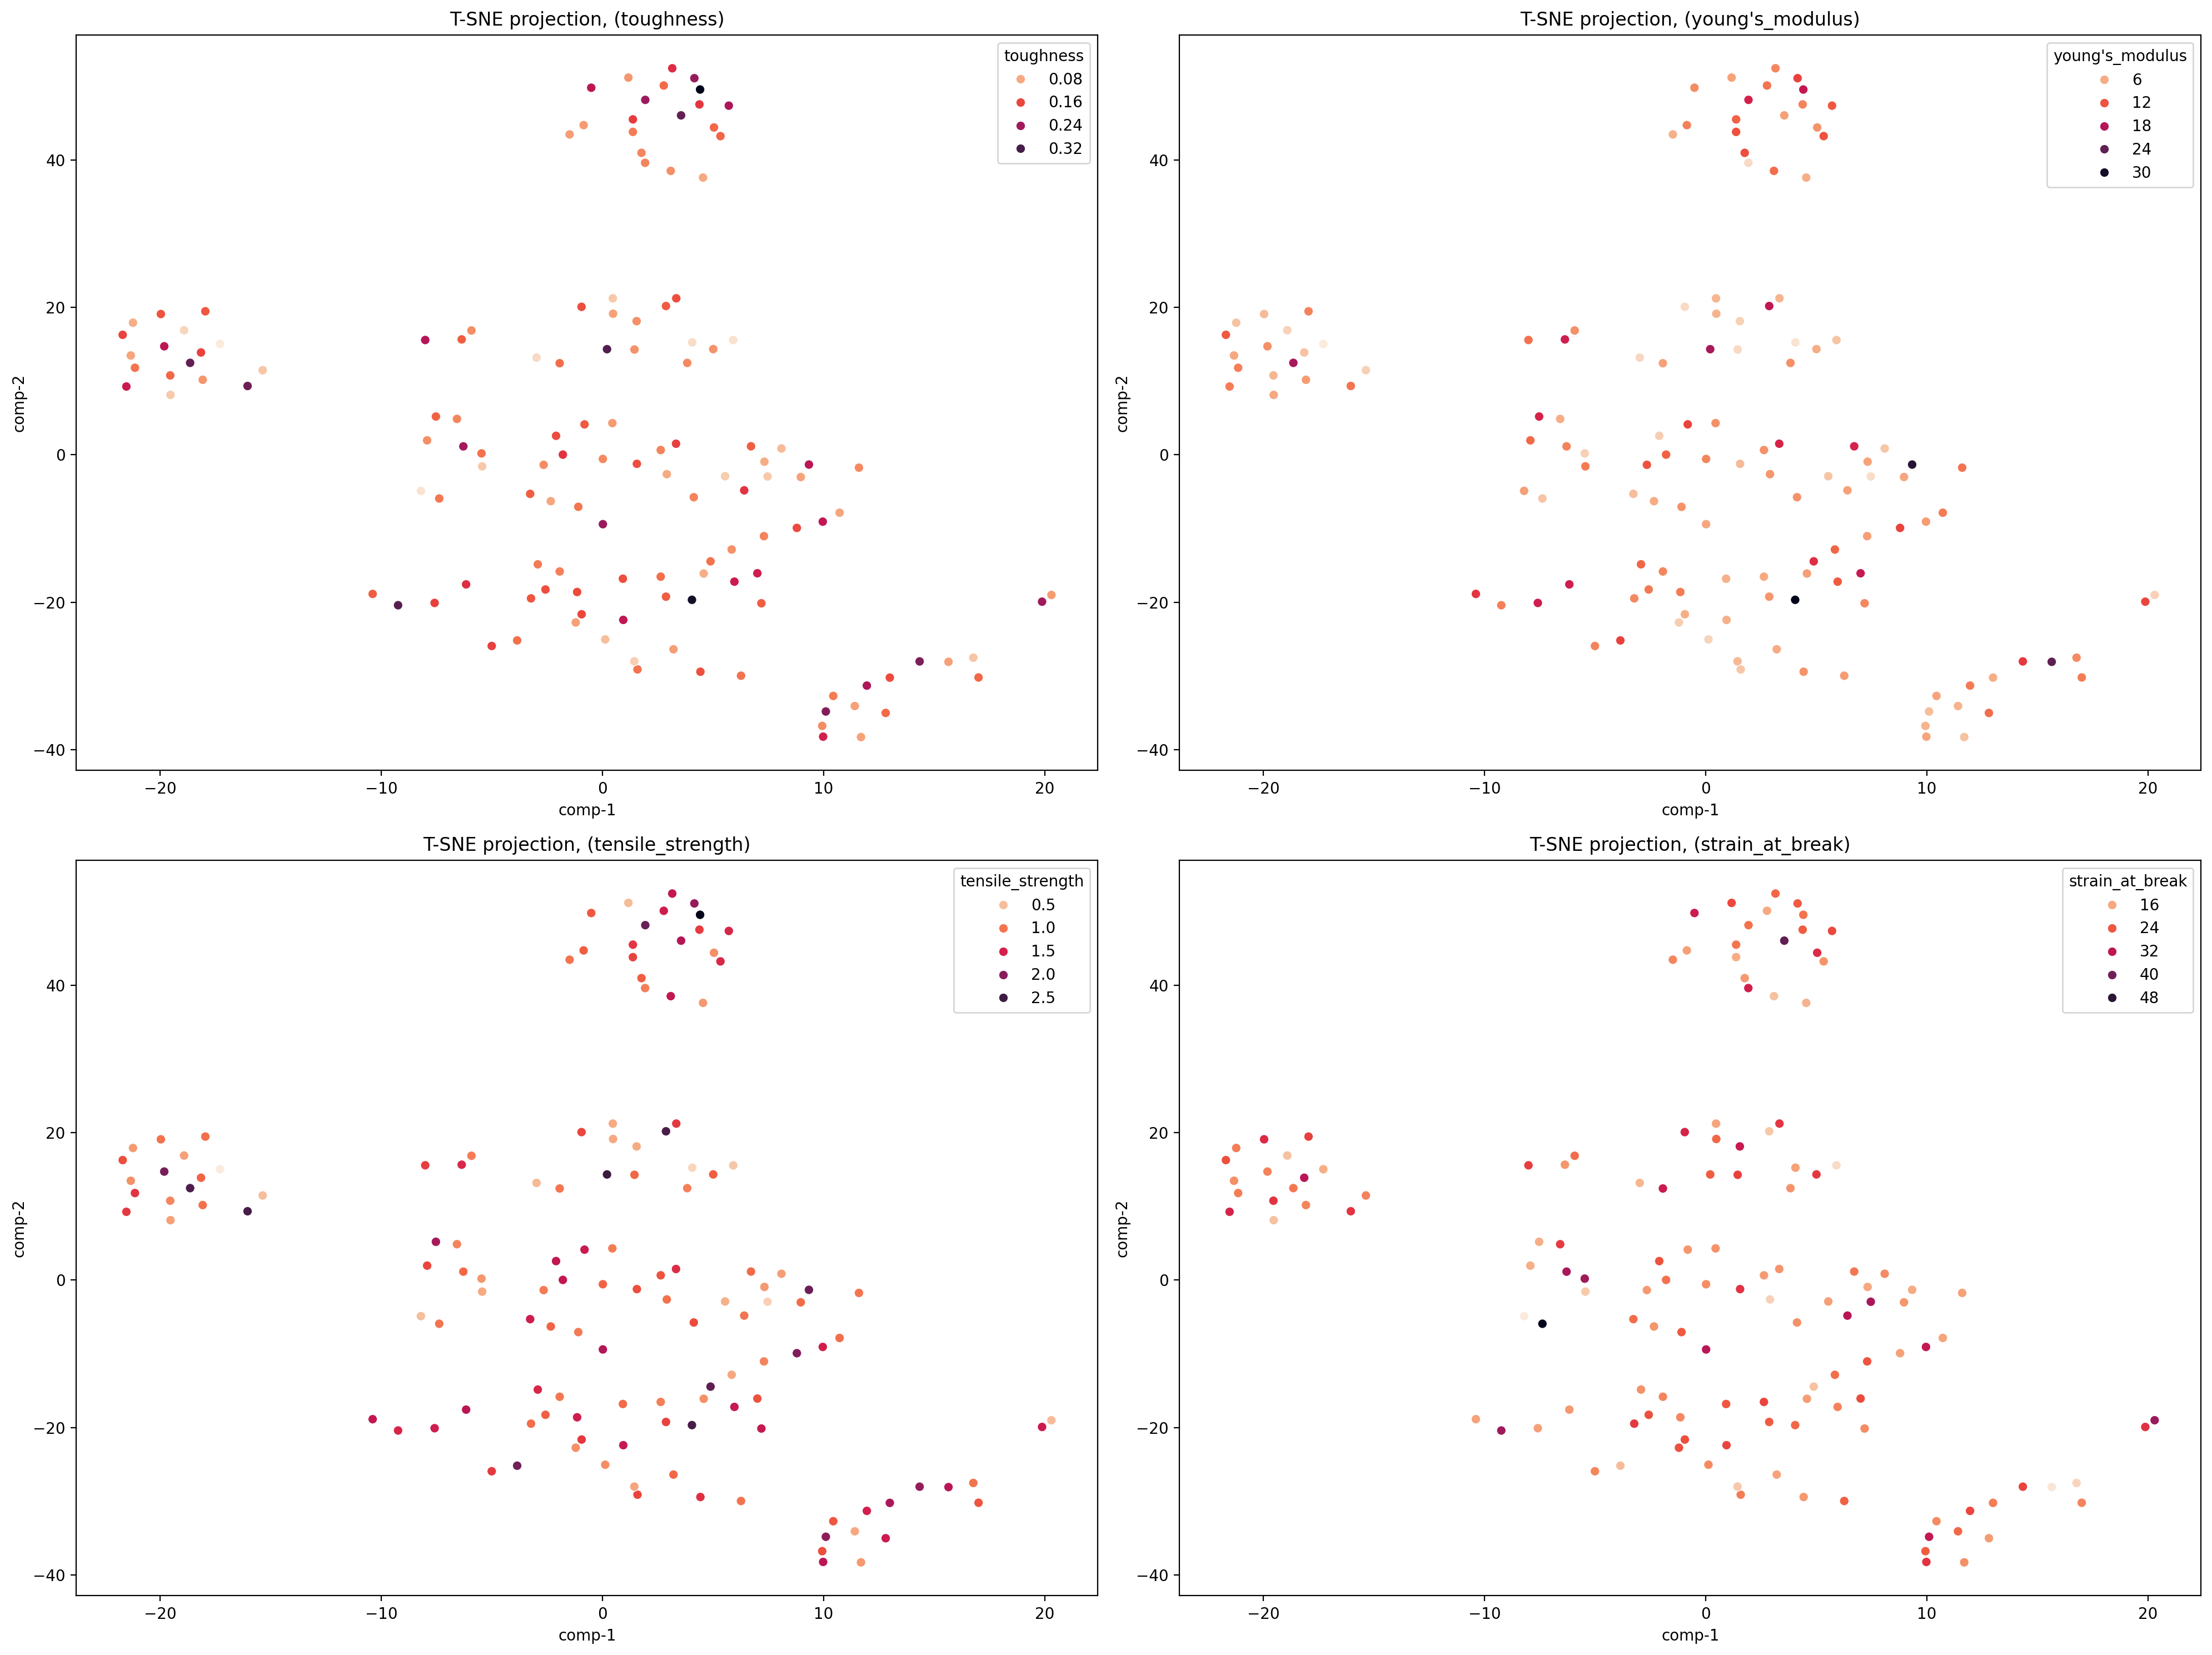

In [ ]:

plt.figure(figsize=(12, 8))

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, e in enumerate(['toughness', "young's_modulus", 'tensile_strength', 'strain_at_break']): 
    row = i // 2
    col = i % 2
    sns.scatterplot(x="comp-1", y="comp-2", hue=e, data=df_tsne, palette="rocket_r", ax=axes[row, col])
    axes[row, col].set_title(f"T-SNE projection, ({e})")


plt.tight_layout()
plt.show()

In [ ]:
df_pca

Orthogroup           ID  idv_id        DRR    species_x          Genus  \
4            0   101-W7_S13   101.0  DRR296821      pilipes        Nephila   
5            1   1345-W1_S7  1345.0  DRR296993          sia      Yaginumia   
6            3   1793-W1_S4  1793.0  DRR297051       akirai    Cyrtarachne   
7            4  1894-W1_S12  1894.0  DRR296495    ishisawai        Araneus   
8            5   1974-W1_S8  1974.0  DRR297664    marmoreus        Araneus   
..         ...          ...     ...        ...          ...            ...   
194        283  7421-W1_S15  7421.0  DRR168623      extrusa     Caerostris   
195        284   7426-W1_S6  7426.0  DRR168628            -   Acrosomoides   
196        285  7439-W1_S16  7439.0  DRR168624      darwini     Caerostris   
197        286   7441-W1_S4  7441.0  DRR168617     inaurata  Trichonephila   
198        287  7447-W1_S14  7447.0  DRR168618  geometricus    Latrodectus   

          Family       family          genus      species_y  ...  \
4      Araneidae    Araneidae        Nephila        pilipes  ...   
5      Araneidae    Araneidae      Yaginumia            sia  ...   
6      Araneidae    Araneidae    Cyrtarachne         akirai  ...   
7      Araneidae    Araneidae        Araneus      ishisawai  ...   
8      Araneidae    Araneidae        Araneus      marmoreus  ...   
..           ...          ...            ...            ...  ...   
194    Araneidae    Araneidae     Caerostris        extrusa  ...   
195    Araneidae    Araneidae   Acrosomoides  sp. (OTU0988)  ...   
196    Araneidae    Araneidae     Caerostris        darwini  ...   
197    Araneidae    Araneidae  Trichonephila       inaurata  ...   
198  Theridiidae  Theridiidae    Latrodectus    geometricus  ...   

     birefringence_sd diameter diameter_sd water_content supercontraction  \
4                10.4     2.75        0.09           NaN              NaN   
5                10.3     1.19        0.08           NaN              NaN   
6                14.8     3.21        0.89           5.7              NaN   
7                 5.2     2.30        0.21           5.8             47.8   
8                15.1     2.07        0.43           5.8              NaN   
..                ...      ...         ...           ...              ...   
194               2.1     1.45        0.04           NaN             35.2   
195               2.0     2.23        0.04           NaN             39.3   
196               1.2     3.44        0.03           7.1             43.9   
197               9.7     6.69        0.63           5.8             43.3   
198               5.8     2.49        0.20           6.0             21.4   

    supercontraction_sd        PC1        PC2        PC3       PC4  
4                   NaN  -0.321223  10.179712  -6.101422  2.630978  
5                   NaN  -5.977702  -0.043937  -1.331649 -0.858963  
6                   NaN  -7.743254  -1.450318  -2.334144 -7.963693  
7                   4.8 -12.551678   2.883358  11.249490  1.724249  
8                   NaN  -9.218670  -1.382086   9.120778  3.493966  
..                  ...        ...        ...        ...       ...  
194                11.1  -0.330098   8.015917  -5.574232 -3.986006  
195                 5.3  -1.631296   8.494423   5.387478  1.594663  
196                 4.4  -0.500781   6.787602  -4.779768  1.255959  
197                 3.6   1.651671  15.068943  -6.635019  3.413189  
198                 2.6  11.840331  -5.646909  -4.110469 -1.421177  

[195 rows x 40 columns]

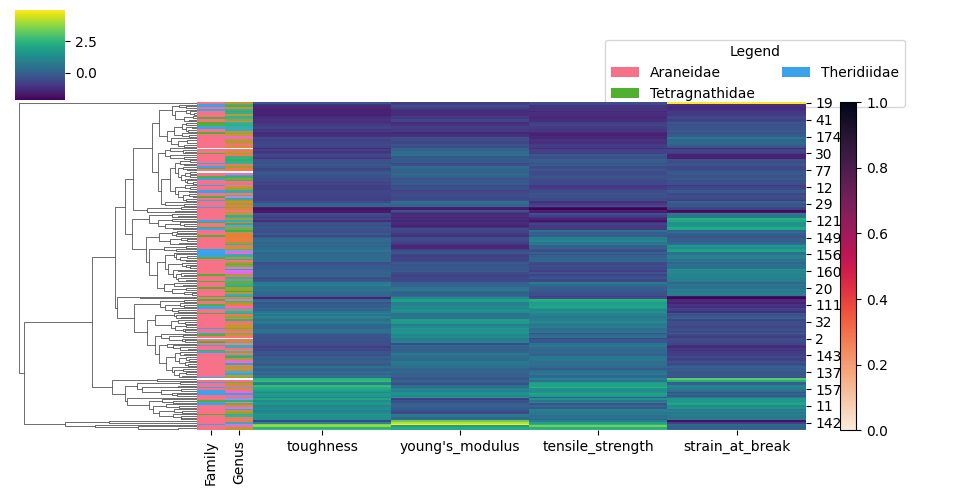

In [ ]:
mech_prop = ['toughness',"young's_modulus", 
       'tensile_strength', 'strain_at_break']
# df_pca = df.iloc[3:, 7:-30].apply(pd.to_numeric, errors='coerce').fillna(0)


family_palette = sns.color_palette("husl", n_colors=len(df.iloc[4:, :]['Family'].unique()))
genus_palette = sns.color_palette("husl", n_colors=len(df.iloc[4:, :]['Genus'].unique()))
# cluster_palette = sns.color_palette("husl", n_colors=len(df.iloc[4:, :]['Cluster'].unique()))



family_colors = df.iloc[4:, :]['Family'].map(dict(zip(df.iloc[4:, :]['Family'].unique(), family_palette)))
genus_colors = df.iloc[4:, :]['Genus'].map(dict(zip(df.iloc[4:, :]['Genus'].unique(), genus_palette)))
# cluster_colors = df.iloc[4:, :]['Cluster'].map(dict(zip(df.iloc[4:, :]['Cluster'].unique(), cluster_palette)))

color_df = pd.DataFrame({"Family": family_colors, "Genus": genus_colors})
# , "Cluster":cluster_colors



scaler = StandardScaler()
mech_p = df.iloc[4:][mech_prop].apply(pd.to_numeric, errors='coerce').fillna(0)

mech_prop_standarrdized = scaler.fit_transform(mech_p)
df_standardized_mech = pd.DataFrame(mech_prop_standarrdized, columns=mech_p.columns)



cluster = sns.clustermap(df_standardized_mech, row_cluster=True,  col_cluster=False, 
                          row_colors=color_df, cmap='viridis',
                          figsize=(10, 5))

for label, color in zip(df.iloc[4:, :]['Family'].unique(), family_palette):
    cluster.ax_col_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)

cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=cluster.ax_heatmap)
cb.set_label('')  

cluster.ax_col_dendrogram.legend(title='Legend', loc='lower left', bbox_to_anchor=(0.5, -0.2), ncol=2)


plt.show()

<Figure size 1200x800 with 0 Axes>

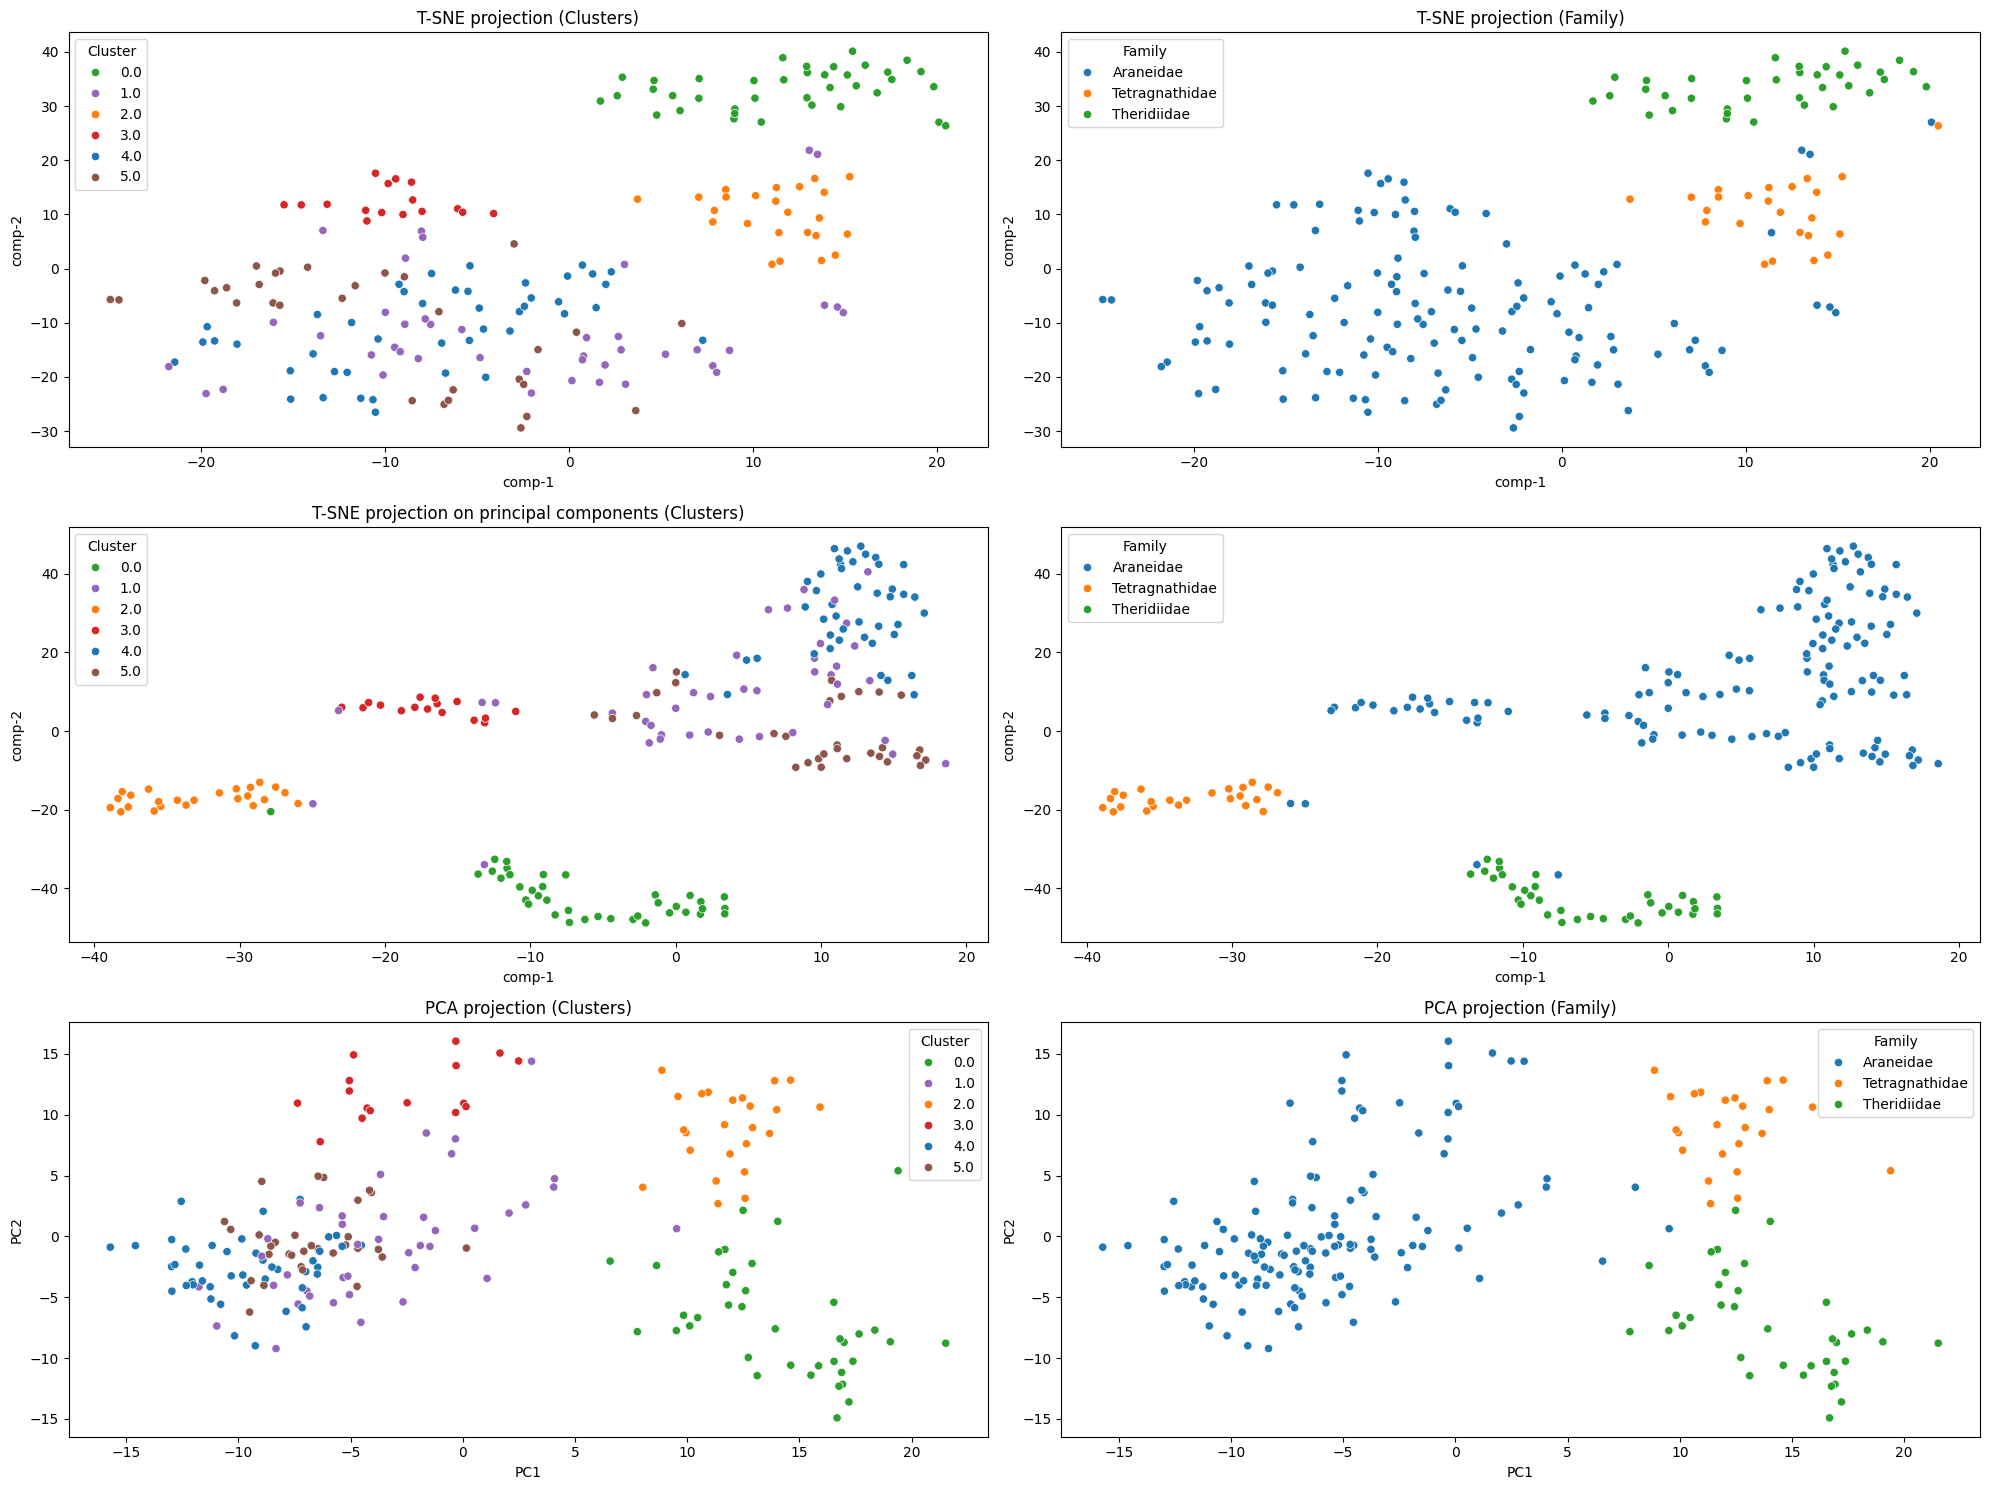

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))


fig, axes = plt.subplots(3, 2, figsize=(20, 15))
cluster_colors = {0:'#2ca02c', 1: '#9467bd', 2: '#ff7f0e', 3:'#d62728', 4: '#1f77b4', 5: '#8c564b'}

# Scatter plot 1 - t-SNE with Clusters
sns.scatterplot(x="comp-1", y="comp-2", hue="Cluster", data=df_tsne, palette=cluster_colors, ax=axes[0, 0])
axes[0, 0].set_title("T-SNE projection (Clusters)")

# Scatter plot 2 - t-SNE with Family
sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_tsne, palette="tab10", ax=axes[0, 1])
axes[0, 1].set_title("T-SNE projection (Family)")

sns.scatterplot(x="comp-1", y="comp-2", hue="Cluster", data=df_tsne_pca
, palette=cluster_colors, ax=axes[1, 0])
axes[1, 0].set_title("T-SNE projection on principal components (Clusters)")

# Scatter plot 2 - t-SNE with Family
sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_tsne_pca
, palette="tab10", ax=axes[1, 1])
axes[2, 1].set_title("T-SNE projection on principal components (Family)")


# Scatter plot 3 - PCA with Clusters
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_filtered_PC, palette=cluster_colors, ax=axes[2, 0])
axes[2, 0].set_title("PCA projection (Clusters)")

# Scatter plot 4 - PCA with Family
sns.scatterplot(x="PC1", y="PC2", hue="Family", data=df_filtered_PC, palette="tab10", ax=axes[2, 1])
axes[2, 1].set_title("PCA projection (Family)")


plt.tight_layout()
plt.show()



get pca and put that into tsne. 


<Figure size 1200x800 with 0 Axes>

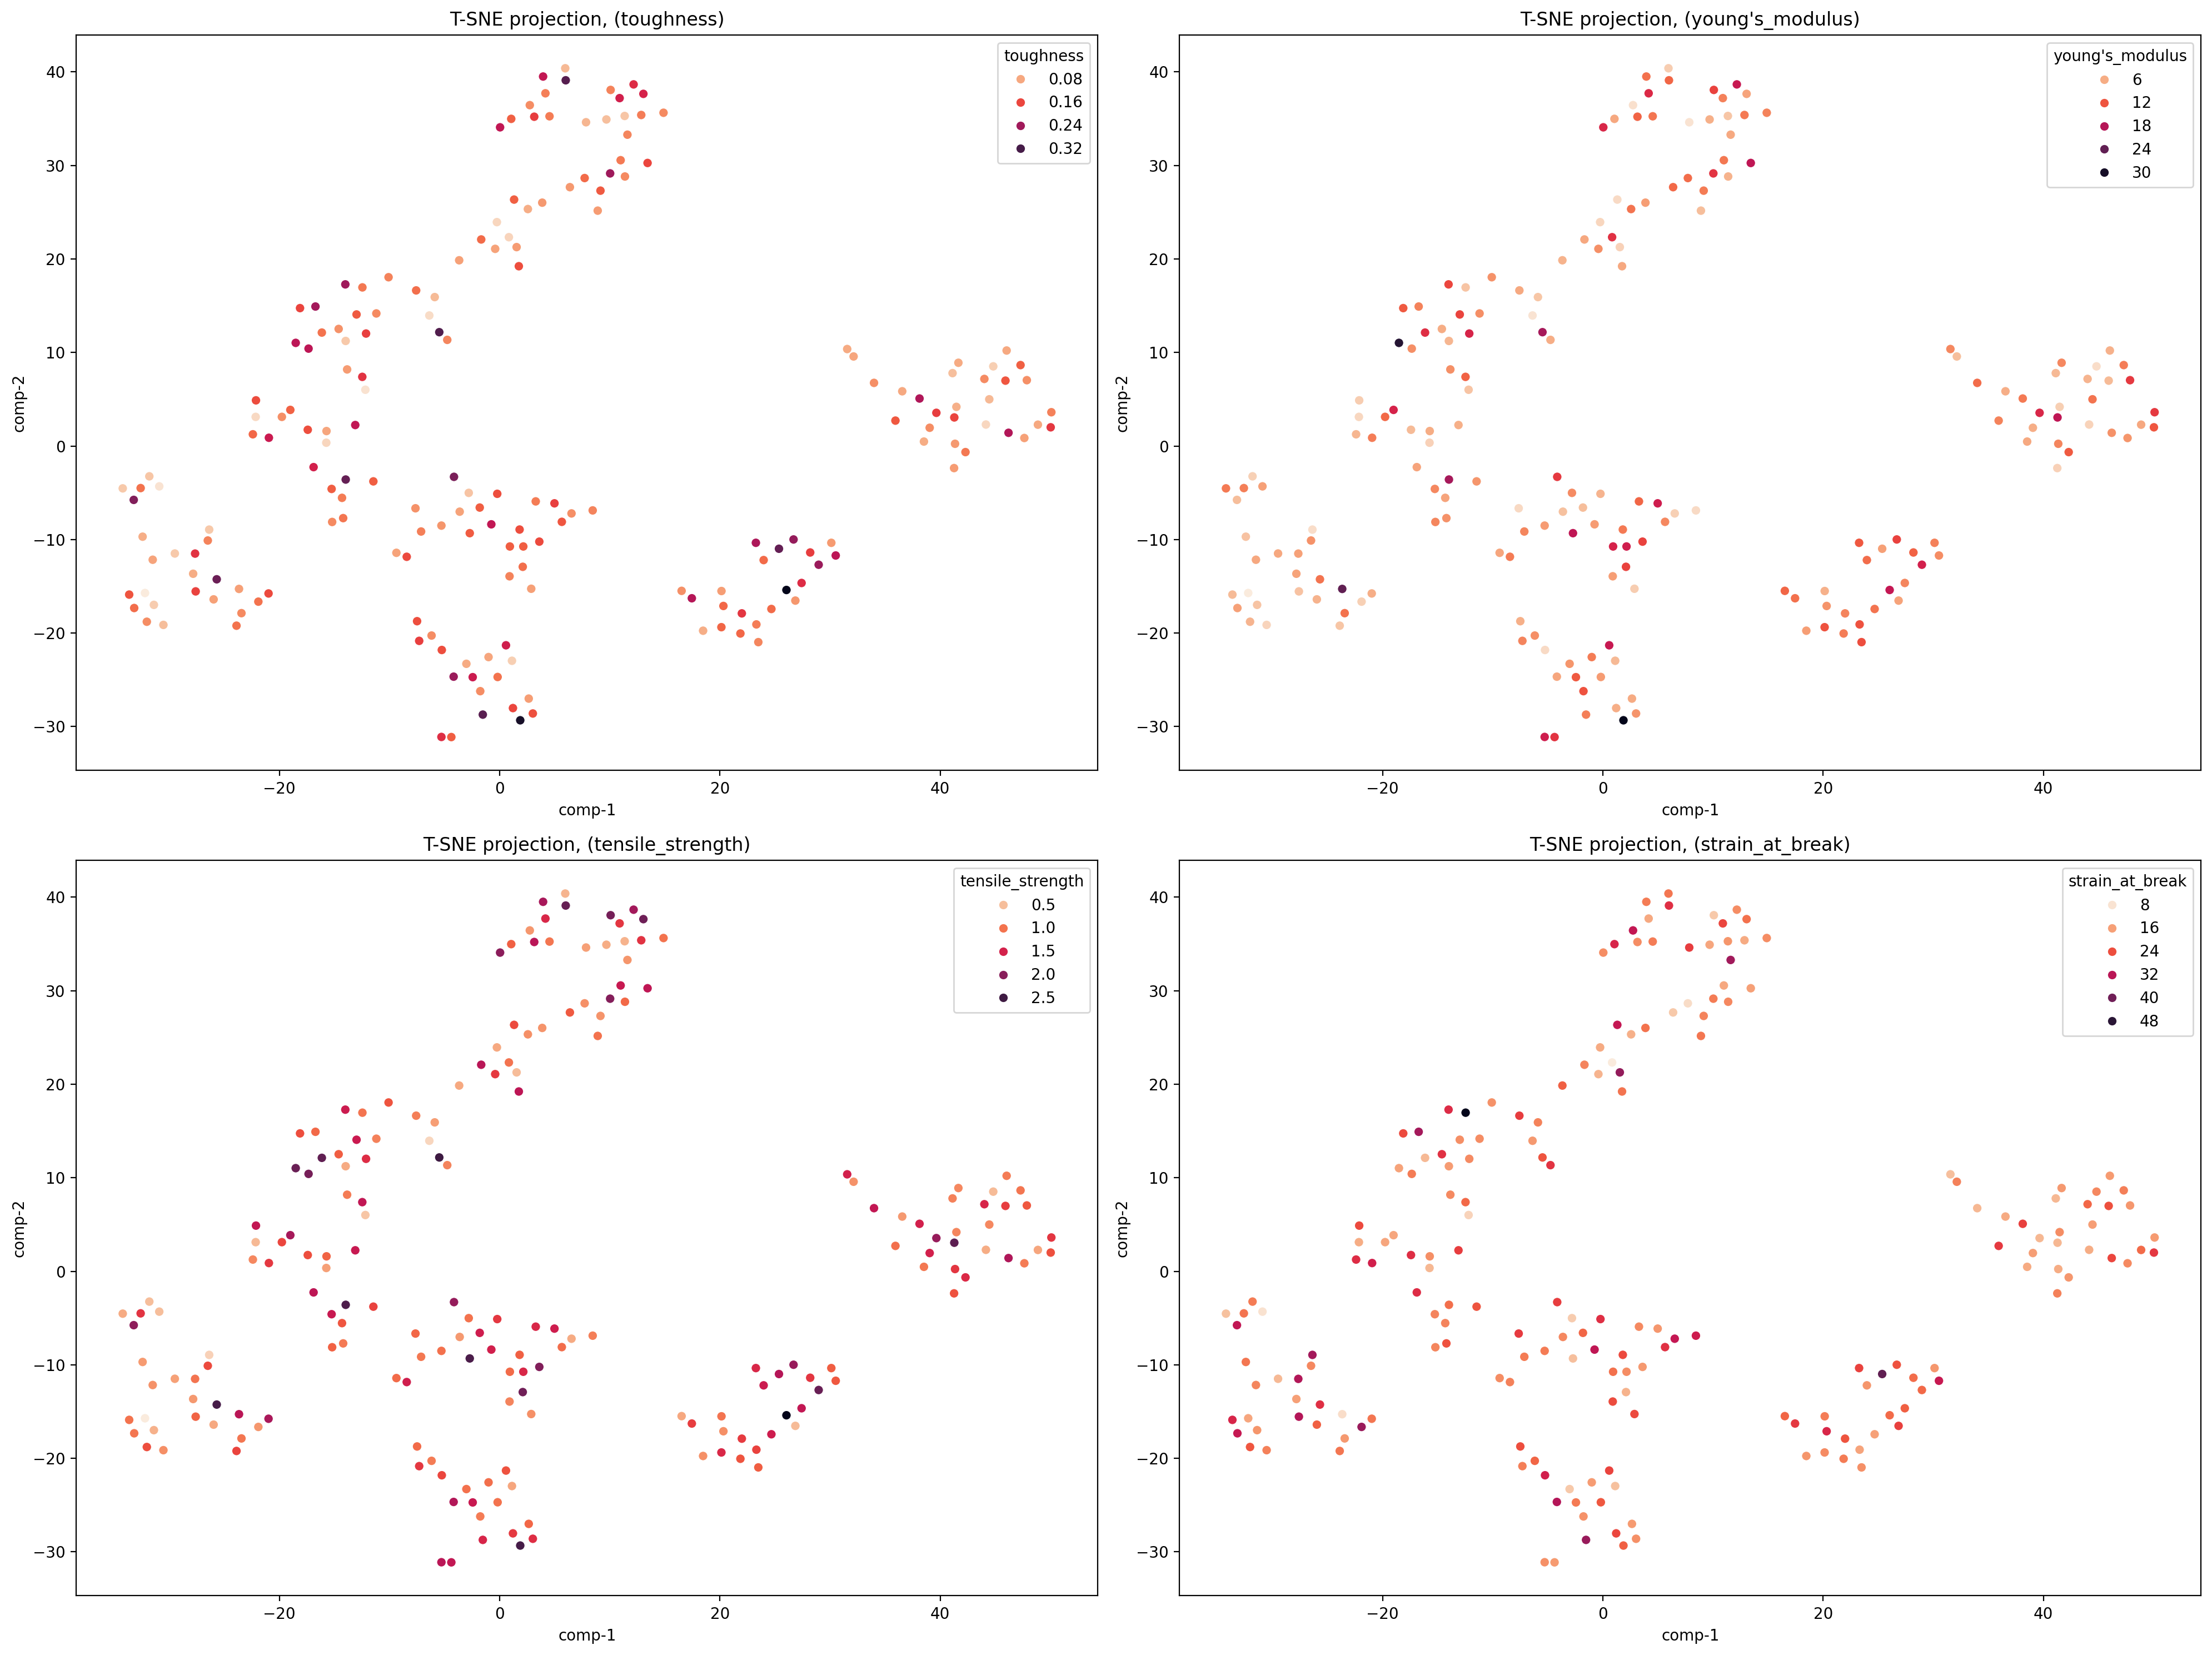

In [ ]:

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, e in enumerate(['toughness', "young's_modulus", 'tensile_strength', 'strain_at_break']): 
    row = i // 2
    col = i % 2
    sns.scatterplot(x="comp-1", y="comp-2", hue=e, data=df_tsne, palette="rocket_r", ax=axes[row, col])
    axes[row, col].set_title(f"T-SNE projection, ({e})")


plt.tight_layout()
plt.show()


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, early_exaggeration = 20.0, perplexity = 10, verbose=1, random_state=123)
df_pca = spidroin_df_part.iloc[3:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_pca)
z = tsne.fit_transform(standardized_data) 
df_tsne_spid = spidroin_df_part.iloc[3:, :]
# df_tsne["y"] = spidroin_df.iloc[3:, :]["tensile_strength"]
df_tsne_spid["comp-1"] = z[:,0]
df_tsne_spid["comp-2"] = z[:,1]
plt.figure(figsize=(10, 6))


NameError: name 'spidroin_df_part' is not defined

<Figure size 1200x800 with 0 Axes>

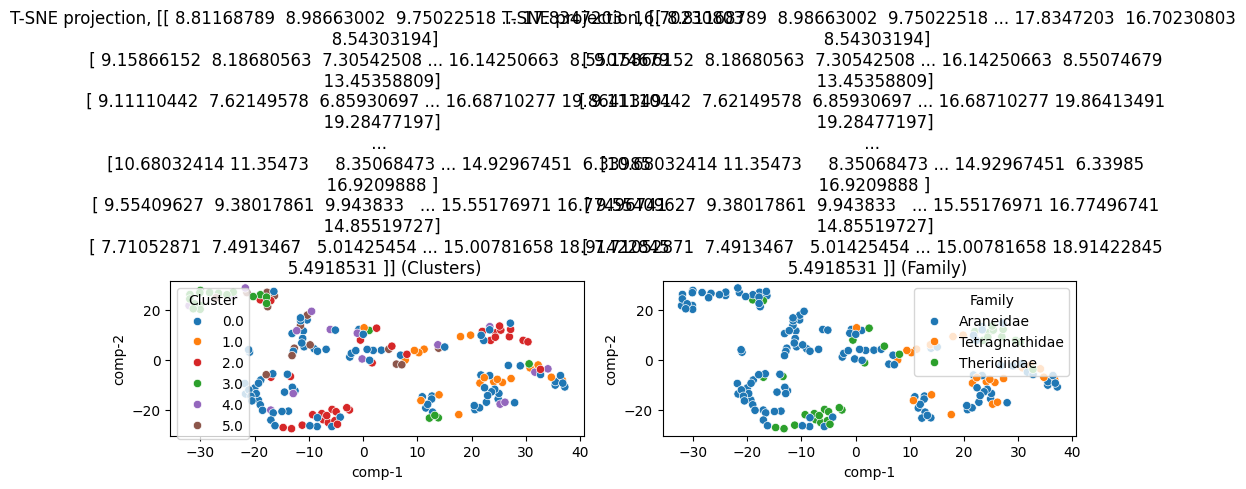

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#d62728', 3: '#2ca02c', 4: '#9467bd', 5: '#8c564b'}

sns.scatterplot(x="comp-1", y="comp-2", hue="Cluster", data=df_tsne_spid, palette=cluster_colors, ax=axes[0])
axes[0].set_title(f"T-SNE projection, {features} (Clusters)")

sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_tsne_spid, palette="tab10", ax=axes[1])
axes[1].set_title(f"T-SNE projection, {features} (Family)")


plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'T-SNE projection, Spidroin datset')]

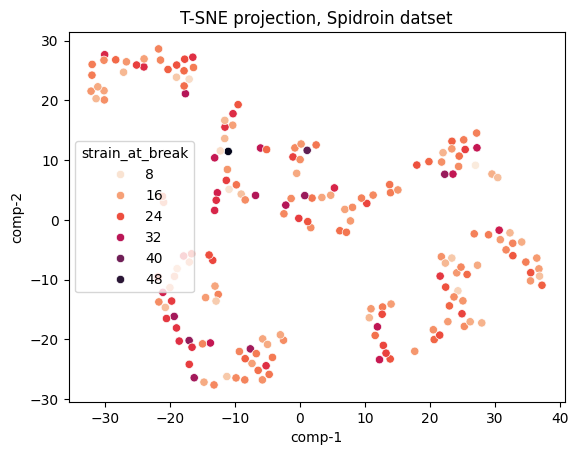

In [ ]:

sns.scatterplot(x="comp-1", y="comp-2", hue="strain_at_break",
                data=df_tsne_spid, palette="rocket_r").set(title="T-SNE projection, Spidroin datset") 

In [ ]:
spidroin_df_part["Cluster"].value_counts()

Cluster
0.0    85
2.0    34
3.0    21
1.0    20
4.0    16
5.0    15
Name: count, dtype: int64

In [ ]:


def violin_plot(gene, df, label_text = ""):

    if isinstance(gene, str): 
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.violinplot(y=df[gene], ax=ax, scale="count")
        ax.set_title(f"Violin Plot for {gene}")
        ax.set_ylabel('log2 cpm')
        plt.text(0.5, 0.5, label_text, fontsize=12, ha='center', va='center') 
        plt.show()
    elif isinstance(gene, list): 
        num_genes = len(gene)
        num_cols = min(num_genes, 6)  
        num_rows = (num_genes - 1) // num_cols + 1
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 6*num_rows))
        axes = axes.flatten()
        
        for i, g in enumerate(gene):
            ax = axes[i]
            sns.violinplot(y=df[g], ax=ax)
            ax.set_title(f"Violin Plot for {g}")
            ax.set_ylim(0, 1)
            ax.set_ylabel('log2 cpm')
            plt.text(0.5, 0.5, label_text, fontsize=12, ha='center', va='center')  
            

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()  
        return plt



In [ ]:
violin_plot(features, spidroin_df_part.iloc[3:, :])

In [ ]:
spidroin_df_part.columns

Index(['Orthogroup', 'ID', 'idv_id', 'DRR', 'species_x', 'Genus', 'Family',
       'MaSp1', 'MaSp2_comb', 'MaSp3_comb', 'family', 'genus', 'species_y',
       'ncbi_tax_id', 'wsc_lsid', 'type_of_web', 'sex', 'sampled_at',
       'country', 'size', 'toughness', 'toughness_sd', 'young's_modulus',
       'young's_modulus_sd', 'tensile_strength', 'tensile_strength_sd',
       'strain_at_break', 'strain_at_break_sd', 'one_percent_weightloss',
       'five_percent_weightloss', 'ten_percent_weightloss', 'crystallinity',
       'birefringence', 'birefringence_sd', 'diameter', 'diameter_sd',
       'water_content', 'supercontraction', 'supercontraction_sd', 'Cluster'],
      dtype='object')